In [7]:
%load_ext lab_black
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import loadmat, savemat
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit, minimize, least_squares
from scipy.integrate import trapz
from scipy.stats import norm, kurtosis
from matplotlib.ticker import ScalarFormatter

%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [36]:
# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc

rc("font", family="serif")
# c('text', usetex=True)
rc("xtick", labelsize="x-small")
rc("ytick", labelsize="x-small")


def cm2inch(value):
    return value / 2.54

In [3]:
raw_data = loadmat('fit_result_dur_27052020_n_r_fix_0p0513_wav_532_r_1p516_n_1.597.mat')["data"][:,0:3]
#raw_data = raw_data[45000:,:]
#raw_data = raw_data[1:,:]

r = 1.516*1e-6
n_part =  1.597
fps = 60
time = np.arange(0,np.shape(raw_data)[0])/fps


In [20]:
x = raw_data[:, 0:1] * 0.0513 * 1e-6

In [21]:
def _c4(z, t):
    return (
        1
        / 24
        * (
            np.mean((z[:, -t] - z[t, :]) ** 4)
            - 3 * np.mean((z[:, -t] - z[t, :]) ** 2) ** 2
        )
    )


def c4(z, t):
    return np.array([_c4(z, i) for i in t])

In [43]:
def _C4(x, t):
    return (
        1
        / 24
        * (np.mean((x[:-t] - x[t:]) ** 4) - 3 * (np.mean((x[:-t] - x[t:]) ** 2)) ** 2)
    )


def C4(x, t):
    return np.array([(_C4(x, i)) for i in t])


tt = np.array(
    [
        *np.arange(1, 10, 1),
        *np.arange(10, 100, 10),
    ]
)

In [44]:
c4_exp = C4(x, tt)

In [45]:
c4_exp

array([ 7.64217416e-32,  2.29662770e-31,  4.22750108e-31,  6.97914440e-31,
        1.05049365e-30,  1.36110394e-30,  1.76754585e-30,  2.05824905e-30,
        2.35362397e-30,  2.67749097e-30,  8.46237168e-30,  2.23647387e-29,
        1.79655007e-29, -4.02059795e-31, -1.98558921e-29, -1.47431995e-30,
        5.75089726e-29,  2.02105067e-28])

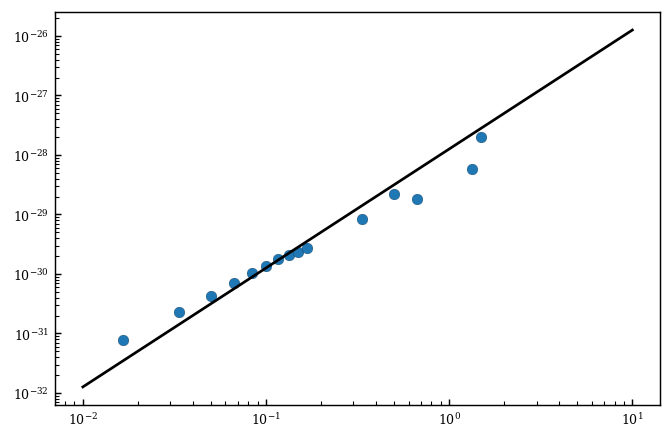

In [46]:
plt.loglog(tt / 60, c4_exp, "o")
tth = np.linspace(1e-2, 10)
plt.plot(tth, 1.2595873833284212e-28 * tth ** 2, color="k")